In [20]:
# Load Pakages Mathematical and DATA Operations
import numpy as np 
import pandas as pd 

# Load Pakages plotting
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing STYLE to set the Style
from matplotlib import style

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
sns.set()
from collections import Counter

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakage COLUMNTRANSFORMER to apply transformers to columns of an array. 
from sklearn.compose import ColumnTransformer

# Load Pakages for Data Partetions
from sklearn.model_selection import train_test_split

# Importing Pipes for making the Pipe Flow
from sklearn.pipeline import Pipeline

# Load Pakages for Model Building
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Load Pakages for Evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing WIDGETS to Build a WIDGETS
import ipywidgets as widgets

# Importing the DISPLAY Function to Display the widgets
from IPython.display import display

In [23]:
# Load Dataset
data = pd.read_csv("insurance.csv")

#  Exploratory Data Analysis

In [ ]:
# Displaying the First 5-Records of data
data.head(5)

In [25]:
# Displaying the Last 5-Records of data
data.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [26]:
# Displaying the Random 5-Records of data
data.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1266,55,female,30.5,0,no,southwest,10704.47
614,20,female,33.0,0,no,southeast,1880.07
534,64,male,40.5,0,no,southeast,13831.12
1062,59,male,41.1,1,yes,southeast,48970.25
1024,47,female,45.3,1,no,southeast,8569.86


In [27]:
print(f'-> No. of Rows: {data.shape[0]} \n-> No. of Columns: {data.shape[1]}')

-> No. of Rows: 1338 
-> No. of Columns: 7


In [28]:
# Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
Numerical_Features = [i for i in data.dtypes[data.dtypes != 'object'].index]
Categorical_Features = [i for i in data.dtypes[data.dtypes == 'object'].index]
print(f'Numerical Features: {Numerical_Features} \nCategorical Features: {Categorical_Features}')

Numerical Features: ['age', 'bmi', 'children', 'expenses'] 
Categorical Features: ['sex', 'smoker', 'region']


In [30]:
print(f'No. of Numerical Features: {len(Numerical_Features)} \nNo. of Categorical Features: {len(Categorical_Features)}')

No. of Numerical Features: 4 
No. of Categorical Features: 3


In [31]:
# Statistical Summary
data[Numerical_Features].describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [32]:
data[Categorical_Features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [33]:
# check unique values
for i in data.columns:
  print('*************************************',i,'*************************************')
  print(data[i].unique())
  print()

************************************* age *************************************
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

************************************* sex *************************************
['female' 'male']

************************************* bmi *************************************
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30

In [34]:
# Checking for unique values in every column
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [35]:
#Checking the null values 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [36]:
# Getting the total sum of null values
data.isnull().sum().sum()

0

In [37]:
# Listing the type of all columns 
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# Detecting the outliers

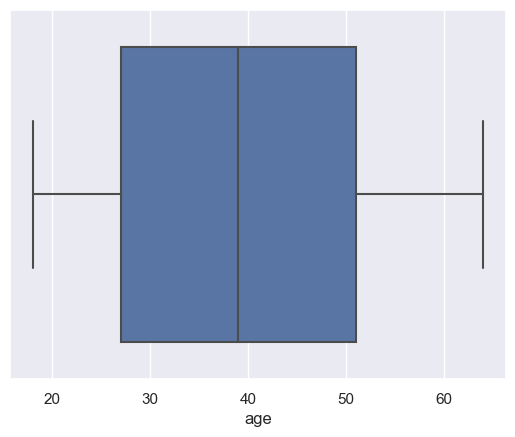

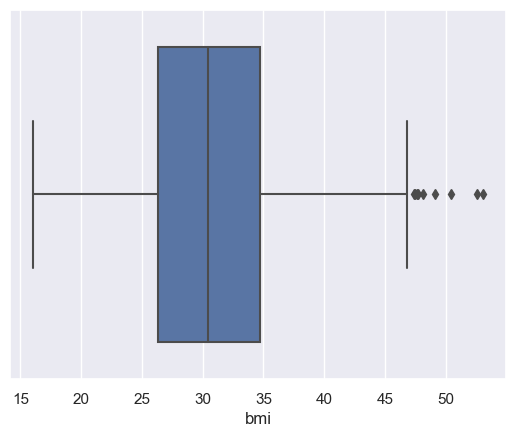

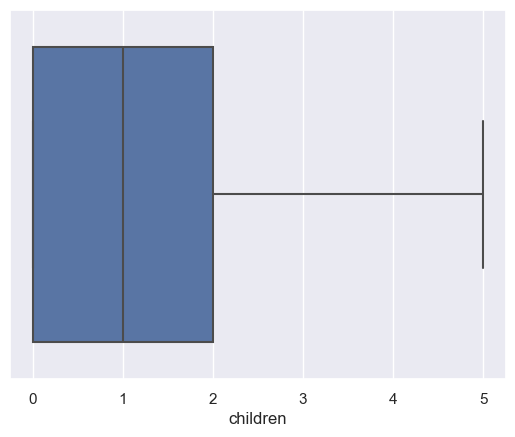

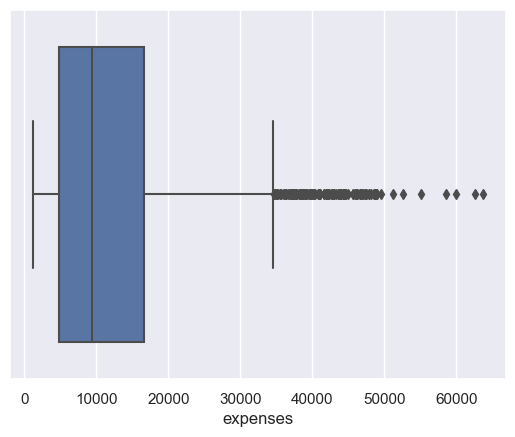

In [39]:
# Function for Boxplot
def Boxplot(dataset):
  for i in dataset.dtypes[dataset.dtypes != 'object'].index:
    sns.boxplot(dataset[i])
    plt.show();

Boxplot(data)

In [40]:
# Function for Detecting the outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data['bmi'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [47.4, 47.5, 47.6, 47.7, 48.1, 49.1, 50.4, 52.6, 53.1]


In [41]:
# no. of Labels of Categorical Variable
for i in Categorical_Features:
  print(f'***********{i}*********** \n{data[i].value_counts()}')

***********sex*********** 
male      676
female    662
Name: sex, dtype: int64
***********smoker*********** 
no     1064
yes     274
Name: smoker, dtype: int64
***********region*********** 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [43]:
# checking Duplicated values
Before_shape = data.shape
Duplicate = data.duplicated().sum()
data = data.drop_duplicates()
after_shape = data.shape
print(f'Orginal Shape: {Before_shape} \nNo. of Duplicates: {Duplicate}\nAfter Droping Duplicate: {after_shape}')

Orginal Shape: (1338, 7) 
No. of Duplicates: 1
After Droping Duplicate: (1337, 7)


# Data Visualization

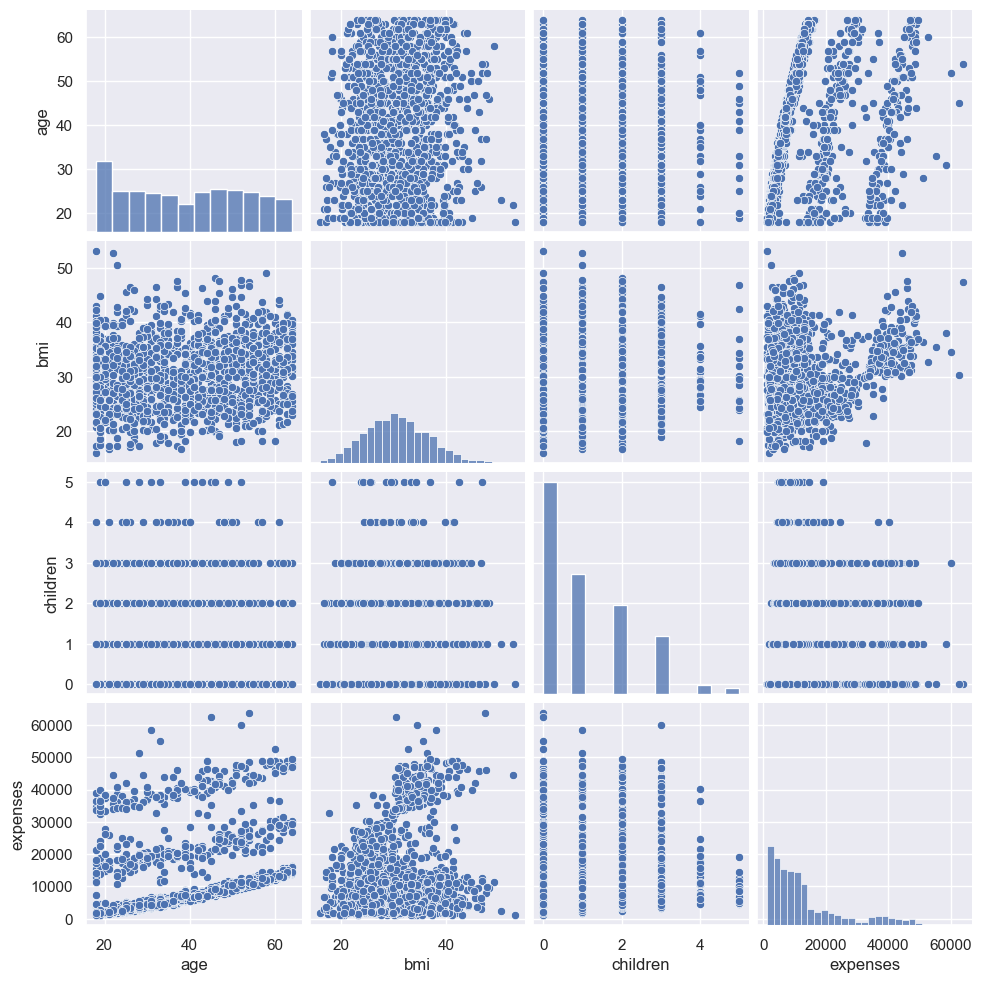

In [45]:
sns.pairplot(data)

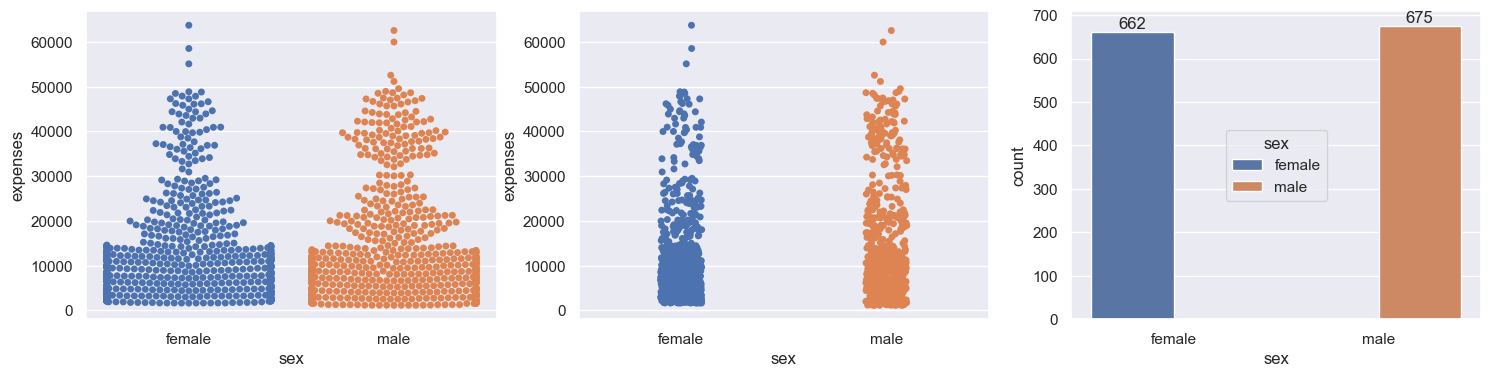

In [46]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.swarmplot(ax=ax[0],x='sex',y='expenses',data=data,)
sns.stripplot(ax=ax[1],x='sex',y='expenses',data=data)
sns.countplot(ax=ax[2],x='sex',hue='sex',data=data)
ax[2].bar_label(ax[2].containers[0])
ax[2].bar_label(ax[2].containers[1])
plt.legend(loc='center',title='sex')

## It shows that count is almost equal not much difference

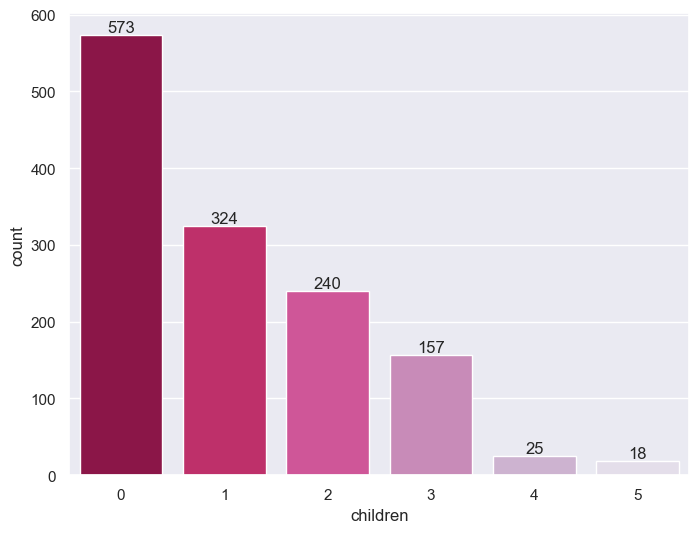

In [49]:
# Children Column
plt.figure(figsize=(8,6))
ax = sns.countplot(data.children,palette='PuRd_r')
ax.bar_label(ax.containers[0]);

## This plot shows us people with zero children is more and people have 1&2 is average compared to 1&2 and 3,4,5 are less that this also decides the cost of a insurance

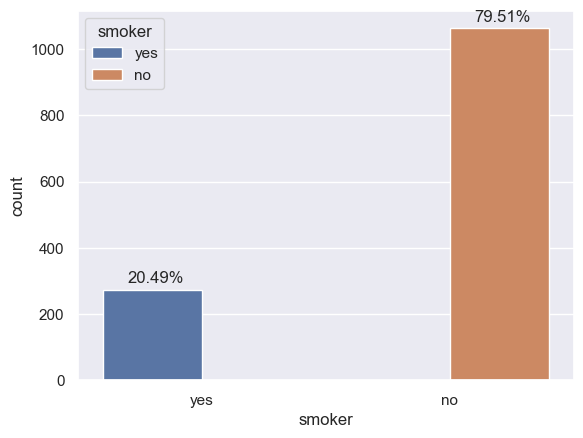

In [52]:
# Smoker
sns.countplot(data.smoker,hue = data.smoker)
plt.text(x = 1.1 ,y = data.smoker.value_counts()[0]+ 20,s = str(round(data.smoker.value_counts()[0]/len(data)*100,2))+ '%')
plt.text(x = -0.3,y = data.smoker.value_counts()[1]+20,s = str(round(data.smoker.value_counts()[1]/len(data)*100,2))+ '%');

## This plot gives us the correct information of about the people that more number of people are Non-smokers

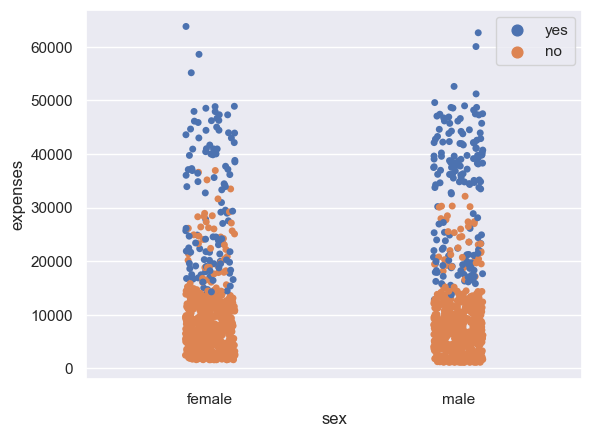

In [55]:
# Gender vs Smoker
sns.stripplot(x = 'sex',y = 'expenses',data = data,hue='smoker')
plt.legend(loc = 'best')

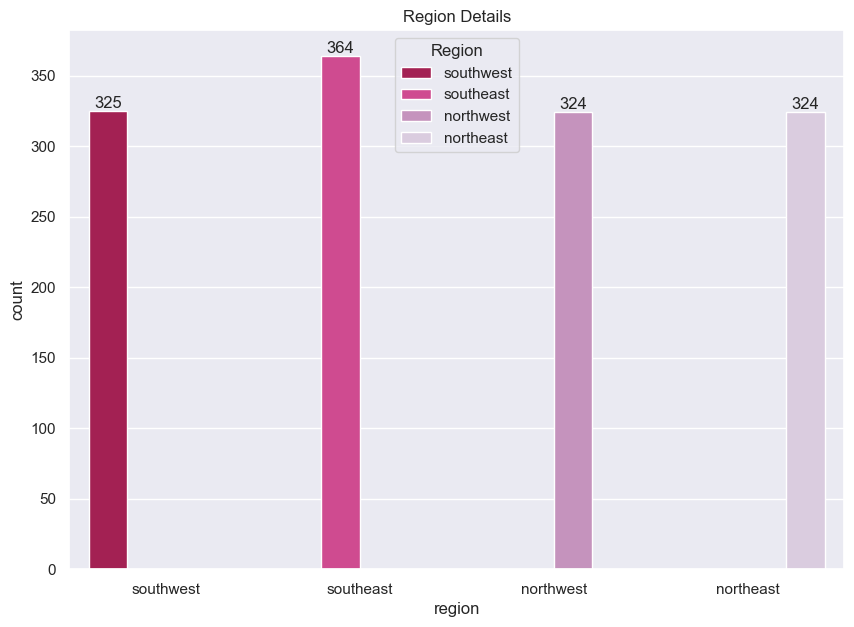

In [56]:
# Region Column
plt.figure(figsize=(10,7))
ax = sns.countplot(x='region',data= data,hue='region',palette='PuRd_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Region Details")
plt.legend(loc='upper center',title='Region')
plt.show()

## This shows we have four regions in that data is nearly normally distrubeted that one region is slightly high tha is SE

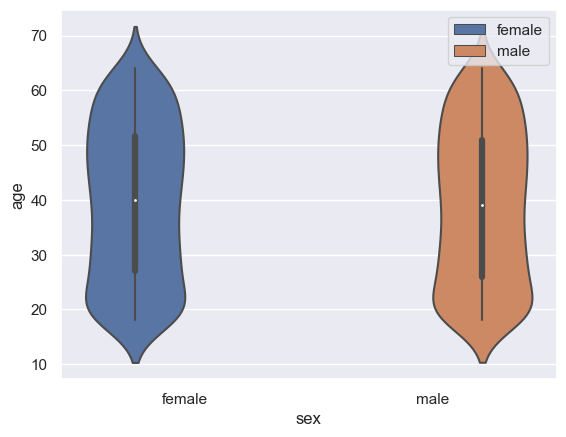

In [58]:
sns.violinplot(x = 'sex',y = 'age',data = data,hue = 'sex')
plt.legend(loc = 'best')

## In both sex peoples are near equal all the ages

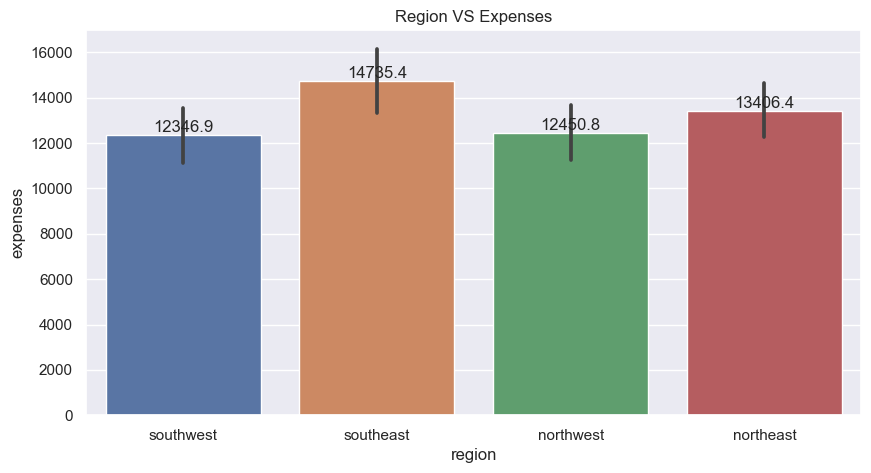

In [60]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='region',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Region VS Expenses')
plt.show()

## From this we get that SE region people have highest expense than others in this case get to know about is that region can also affect the expenses.

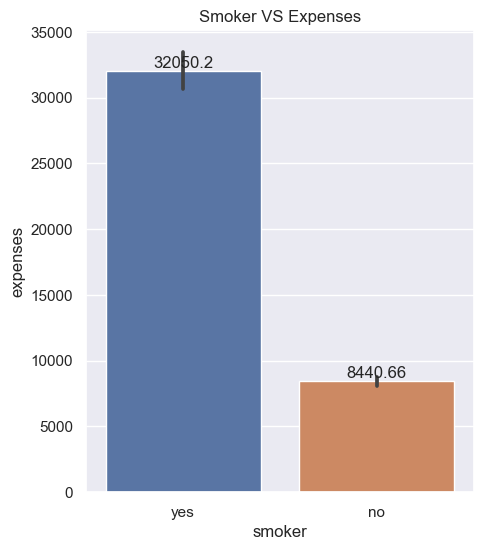

In [61]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='smoker',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Smoker VS Expenses')
plt.show()

## This shows that person who smokes that their expense higher.

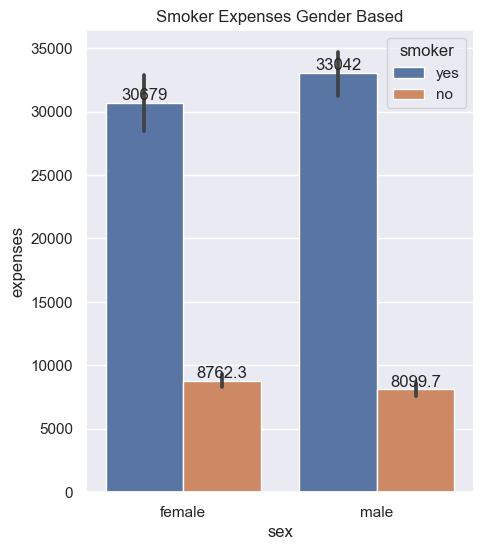

In [63]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='sex',y='expenses',hue='smoker',data = data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Smoker Expenses Gender Based')
plt.show()

## This plot shows that smoker male has higher expense then female but at the same time non smoker female has slightly higher expense than a non smoker male.

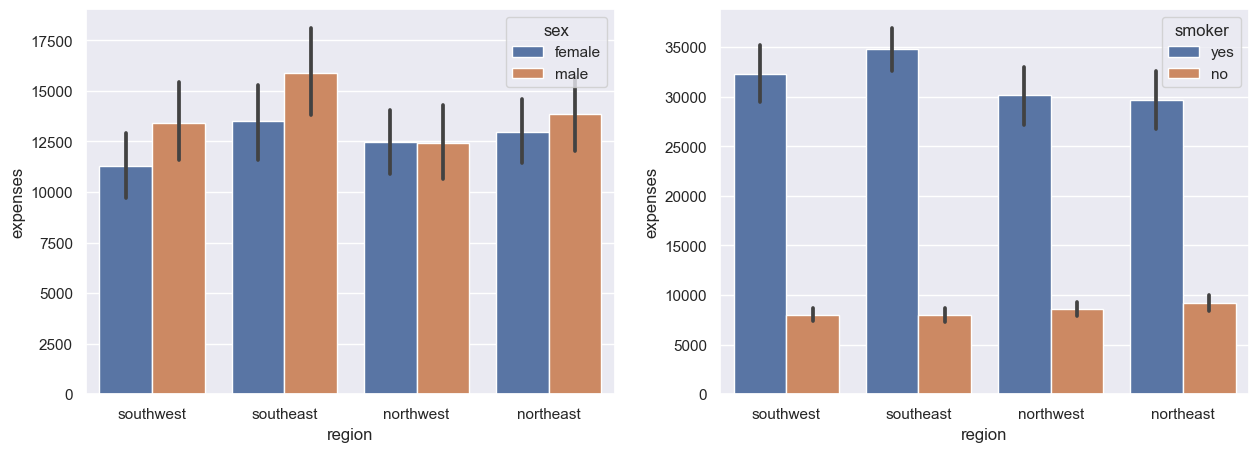

In [64]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

## 1st Plot shows the previous visualization that SE has higher expense but male has higher expense in most categories

## 2nd plot shows non smoker in NE has a higher expense compare to others.

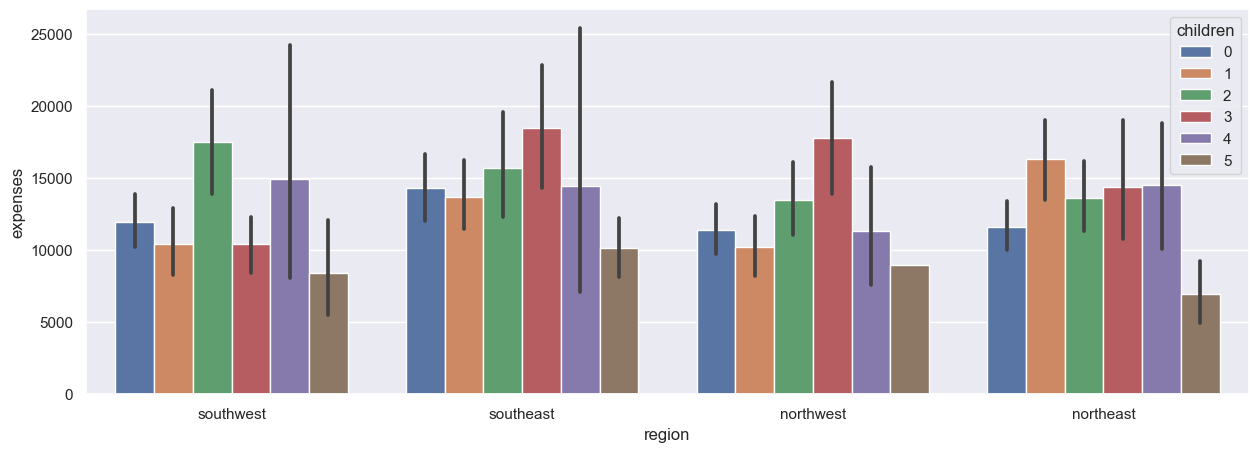

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(data.region, data.expenses, hue = data.children)

plt.show()

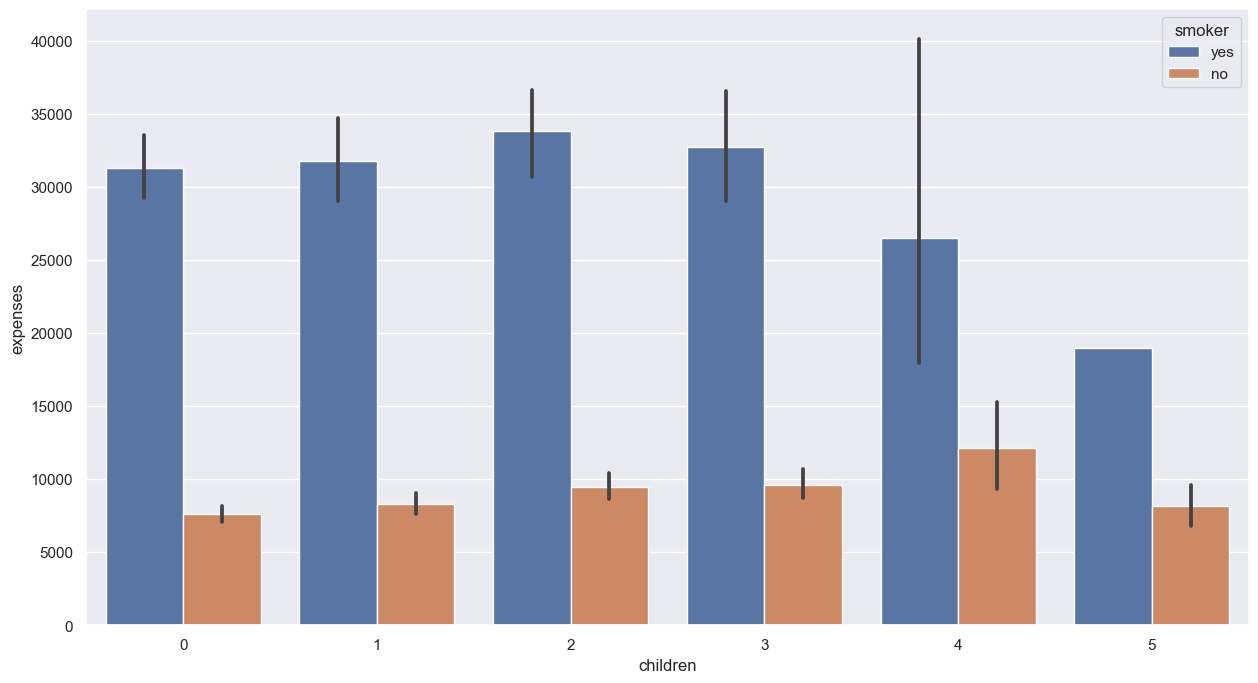

In [66]:
ax1 = f.add_subplot(122)
plt.figure(figsize=(15,8))
sns.barplot(data.children, data.expenses, hue = data.smoker)
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

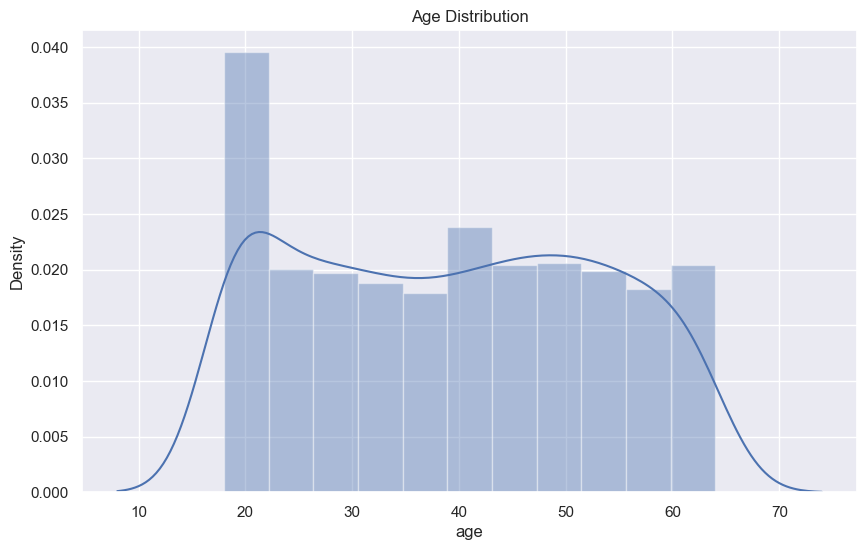

In [67]:
# Distribution of Age Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

## Now we See the Distribution the age value is 10 to 70 we have more density in the age of 20 & 21 other than that the age is distributed normally

## It shows more no of people in our dataset is 20 & 21 age

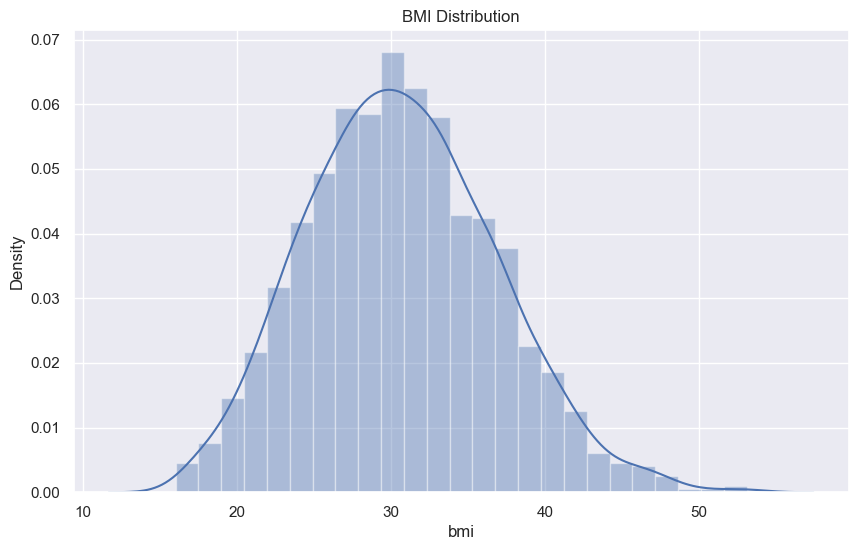

In [68]:
# Distribution of BMI Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

## It shows that BMI is nearly normally distributed,But normal BMI range for a person is 18.5 to 24.9,it shows the lot people are over weight it can affect a insurance cost

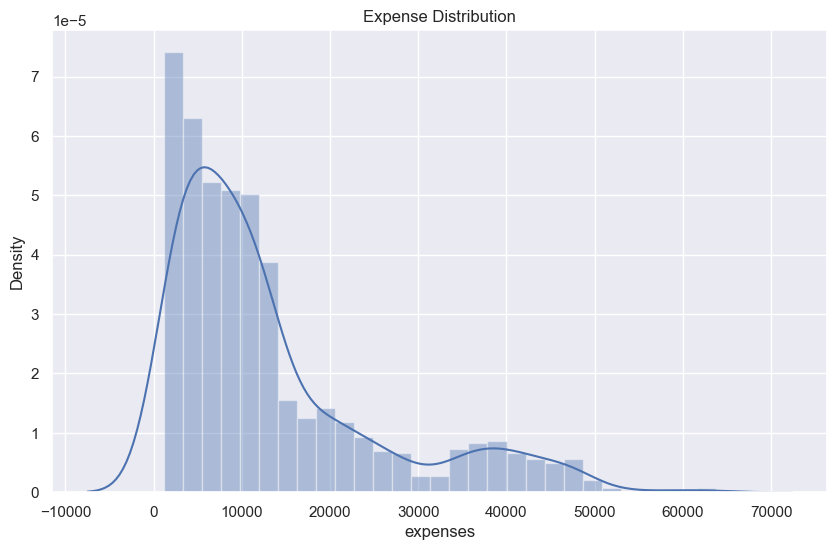

In [69]:
# Distribution of Expenses Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['expenses'])
plt.title('Expense Distribution')
plt.show()

## This Distribution shows us that data is not normally distributed but we have more values in lower expenses that gives cost is not so to high

<AxesSubplot:>

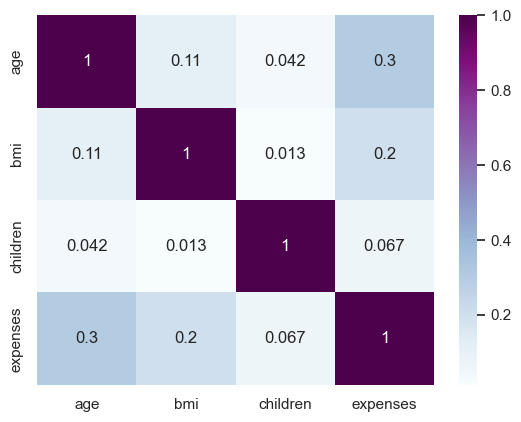

In [70]:
sns.heatmap(data.corr(),annot=True,cmap = 'BuPu')

# Preprocessing

In [71]:
# Creating a function
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and Y
    y = df['expenses']
    x = df.drop('expenses', axis=1)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, shuffle = True, random_state=101)

    return x_train, x_test, y_train, y_test

In [72]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

In [73]:
x_train.head()

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest


In [74]:
y_train.head()

405    11396.90
836     4402.23
483     9880.07
319     4667.61
957    12609.89
Name: expenses, dtype: float64

# Building a Pipeline & Training

In [75]:
# Pipeline Concentrate in categorical columns and scale the data
# Assigning the categorical columns
nominal_features = ['sex', 'smoker', 'region']

# It will transforms the categorical value and skip the binary values
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, drop = 'if_binary'))
])

# Preprorcessor Tells the model which value to be target
# Passthrough will pass a binary columns it won't drop it
preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_features)
], remainder='passthrough')

# Building a model by Scaler & pipeline
KNN_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

RF_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

GB_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])

In [ ]:
# GradientBoostingRegressor

In [76]:
GB_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [77]:
y_pred_GB = GB_model.predict(x_test)

In [78]:
y_pred_GB

array([ 7244.35902298,  3848.39800059,  5035.64427465, 11192.4950453 ,
        7504.20680672,  2617.2617315 , 15218.98677152,  6581.90253468,
       11381.83740075,  5909.01685253,  7359.63039315, 11417.41405381,
       16753.22321671, 13735.07682109,  7684.34962842, 42974.62698258,
        8721.169348  , 10619.97802291, 10780.46510437, 10950.79283934,
        2617.2617315 , 36154.37591844, 24565.30043358, 13411.152626  ,
       35478.98481056, 18266.95285316, 11175.71184785,  9126.2814226 ,
        7868.3202398 ,  7970.15625188,  2541.36951905,  9024.22756174,
        3375.06378907,  5041.21684475,  2059.21285357, 12576.38529502,
        8861.17977492, 11534.8126876 , 14843.41577318,  2579.07842766,
       11969.85160461, 39293.54685737, 11039.05650504, 10036.11698224,
       27899.8284892 ,  2442.87898574, 19501.81613929,  6278.42634783,
       42970.73813492,  5833.97026794,  1142.10785646,  3731.23325687,
        6926.29336031,  7698.04796107,  5318.8187074 , 14379.49366168,
      

In [87]:
# MEAN
y_pred_GB_m = np.mean((y_test - y_pred_GB)**2)
y_pred_GB_m

22259055.028978784

In [88]:
# RMSE
np.sqrt(y_pred_GB_m)

4717.950299545215

In [89]:
# Error for our model
yt_m1 = ((y_test - y_pred_GB)**2)
yt_m1

44      1.356501e+06
134     1.935404e+06
981     2.865507e+05
619     2.293022e+05
1239    1.819677e+07
            ...     
375     3.454401e+05
687     4.588878e+06
103     2.505159e+07
1138    3.796065e+06
715     1.771200e+06
Name: expenses, Length: 402, dtype: float64

In [90]:
# Error between ytest & ytest mean and squaring it
yt_m_diff = ((y_test - y_test.mean())**2)
yt_m_diff

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [91]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m_diff)
yt1

56334917560.88687

In [92]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

8948140121.649471

In [93]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.8411617428572908

In [94]:
r2_score(y_test, y_pred_GB)

0.8411617428572908

In [95]:
# KNN

In [96]:
KNN_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

In [97]:
y_pred_KNN = KNN_model.predict(x_test)

In [98]:
y_pred_KNN

array([ 7039.834,  7332.066,  4491.486, 11731.448,  3603.322,  2125.842,
       11978.454,  8505.568, 10492.018,  6736.724,  9373.748, 10825.57 ,
       13312.88 , 12452.384,  7225.252, 44430.826,  9648.58 , 11417.168,
       13108.462, 12341.504,  2125.842, 30437.312, 35725.794, 10787.354,
       28254.986, 28030.842, 12206.864, 10280.744,  9980.792, 11944.082,
        2980.622,  8767.08 ,  2056.732,  7164.394,  3206.99 ,  6091.212,
       13714.764, 11434.08 , 11958.948,  1651.36 , 16617.93 , 34013.87 ,
        8718.218,  9648.58 , 39746.694,  1802.874, 25122.4  ,  9182.692,
       42872.692,  2720.9  ,  1935.952,  3974.142, 12744.826,  8764.986,
       11685.39 , 11999.932, 22804.1  , 11754.544,  5153.958,  7277.732,
        9350.842, 12006.508, 31382.712, 12710.328, 13172.08 , 13244.376,
        3778.506, 13714.5  , 13663.97 , 37028.202, 29643.332, 35282.044,
        6174.308,  1381.654,  6853.292, 33534.39 , 13103.958, 37300.878,
        2514.368,  8738.626, 11913.904,  5452.592, 

In [99]:
y_test

44       6079.67
134      2457.21
981      4500.34
619     10713.64
1239     3238.44
          ...   
375     18033.97
687      5438.75
103     30942.19
1138     3704.35
715     12146.97
Name: expenses, Length: 402, dtype: float64

In [100]:
# Calculating the error between y-test & y-pred
y_test - y_pred_KNN

44      -960.164
134    -4874.856
981        8.854
619    -1017.808
1239    -364.882
          ...   
375    -6499.518
687    -5273.060
103     4446.450
1138     464.854
715     2430.048
Name: expenses, Length: 402, dtype: float64

In [101]:
# MEAN
y_pred_KNN_m = np.mean((y_test - y_pred_KNN)**2)
y_pred_KNN_m

32062335.073065303

In [102]:
# RMSE
np.sqrt(y_pred_KNN_m)

5662.3612630302305

In [103]:
y_test.describe()

count      402.000000
mean     12673.110274
std      11852.682342
min       1121.870000
25%       4529.420000
50%       8721.255000
75%      14225.402500
max      63770.430000
Name: expenses, dtype: float64

In [104]:
y_train.mean()

13539.674117647048

In [105]:
y_test.mean()

12673.110273631839

In [106]:
# Error between ytest & ytest mean and squaring it
yt_m_diff = ((y_test - y_test.mean())**2)
yt_m_diff

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [107]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m_diff)
yt1

56334917560.88687

In [108]:
# Error for our model
yt_m1 = ((y_test - y_pred_KNN)**2)
yt_m1

44      9.219149e+05
134     2.376422e+07
981     7.839332e+01
619     1.035933e+06
1239    1.331389e+05
            ...     
375     4.224373e+07
687     2.780516e+07
103     1.977092e+07
1138    2.160892e+05
715     5.905133e+06
Name: expenses, Length: 402, dtype: float64

In [109]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

12889058699.372261

In [110]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.7712065756474793

In [111]:
r2_score(y_test, y_pred_KNN)

0.7712065756474793

In [112]:
# Random Forest
RF_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [113]:
y_pred_RF = RF_model.predict(x_test)

In [114]:
y_pred_RF

array([ 7931.2601,  4487.0725, 10461.0909, 11357.9504,  8332.6042,
        1956.714 , 14025.1842,  6020.2464, 10641.4371,  4876.7666,
        6459.4714, 10483.5628, 15109.1536, 13028.5062,  6930.8564,
       43851.392 ,  7886.3344,  9286.6249, 10830.6541, 11101.9903,
        1956.714 , 35935.719 , 24786.5306, 12789.0109, 33730.1217,
       17158.7848, 11835.8308,  8680.4612,  8537.3828,  9338.4646,
        2100.3655,  8411.4787,  2693.102 ,  3620.5133,  2272.5774,
        6930.4106,  9689.1467, 11812.3095, 13746.2358,  2245.9847,
       12761.3641, 40339.5734, 11852.5023,  9380.5181, 25889.6735,
        2715.5245, 18762.8313, 10065.7874, 42298.821 ,  6148.4403,
        1269.9399,  3987.6151,  6669.6094,  6918.3948,  5416.0388,
       13642.8752, 20864.4198, 11630.6755,  6474.6783,  7235.8354,
       11846.903 , 14824.5312, 21255.5619,  9724.1018, 15820.7315,
       11828.3176,  4240.0888,  7613.1308, 14198.6607, 46549.2148,
       36840.9883, 37423.4023,  8548.2524,  2370.34  ,  5698.7

In [115]:
y_test

44       6079.67
134      2457.21
981      4500.34
619     10713.64
1239     3238.44
          ...   
375     18033.97
687      5438.75
103     30942.19
1138     3704.35
715     12146.97
Name: expenses, Length: 402, dtype: float64

In [116]:
# Calculating the error between y-test & y-pred
y_test - y_pred_RF

44     -1851.5901
134    -2029.8625
981    -5960.7509
619     -644.3104
1239   -5094.1642
          ...    
375     -520.5419
687    -4849.6328
103    -1663.6239
1138   -1462.9058
715     -717.4100
Name: expenses, Length: 402, dtype: float64

In [117]:
# MEAN
y_pred_RF_m = np.mean((y_test - y_pred_RF)**2)
y_pred_RF_m

23710267.863630902

In [118]:
# RMSE
np.sqrt(y_pred_RF_m)

4869.31903489912

In [119]:
y_train.mean()

13539.674117647048

In [120]:
y_test.mean()

12673.110273631839

In [121]:
# Error between ytest & ytest mean and squaring it
yt_m_diff = ((y_test - y_test.mean())**2)
yt_m_diff

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [122]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m_diff)
yt1

56334917560.88687

In [123]:
# Error for our model
yt_m1 = ((y_test - y_pred_RF)**2)
yt_m1

44      3.428386e+06
134     4.120342e+06
981     3.553055e+07
619     4.151359e+05
1239    2.595051e+07
            ...     
375     2.709639e+05
687     2.351894e+07
103     2.767644e+06
1138    2.140093e+06
715     5.146771e+05
Name: expenses, Length: 402, dtype: float64

In [124]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

9531527681.179623

In [125]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.8308060419032666

In [126]:
models = [('KNN', np.sqrt(y_pred_KNN_m), r2_score(y_test, y_pred_KNN)),
          ('RF', np.sqrt(y_pred_RF_m), r2_score(y_test, y_pred_RF)),
          ('GB', np.sqrt(y_pred_GB_m), r2_score(y_test, y_pred_GB)) 
         ]

In [127]:
r2_score(y_test,y_pred_RF)

0.8308060419032666

In [128]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score'])
predict

,Model,RMSE,R2_Score
0,KNN,5662.361263,0.771207
1,RF,4869.319035,0.830806
2,GB,4717.950300,0.841162


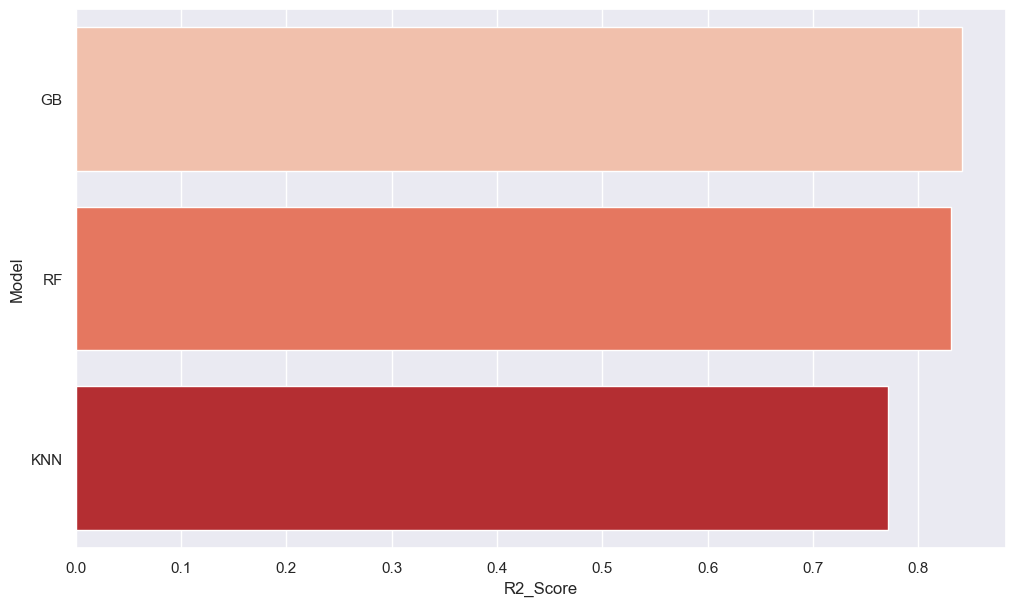

In [129]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['R2_Score'], ascending=False, inplace=True)

sns.barplot(x='R2_Score', y='Model',data = predict, palette='Reds')
plt.xlabel('R2_Score')
plt.ylabel('Model')
plt.show()

## From all the model GradientBoostingRegressor performs well

In [131]:
y = data['expenses']
x = data.drop('expenses', axis=1)

In [134]:
GB_model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [135]:
import joblib

In [136]:
joblib.dump(GB_model,'model_jobliob_gr')

['model_jobliob_gr']

In [137]:
model = joblib.load('model_jobliob_gr')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [141]:
data = {'age':40,'sex':'male','bmi':40.30,'children':4,'smoker':'yes','region':'southwest'}
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,male,40.3,4,yes,southwest


In [142]:
model.predict(df)

array([41881.471169])

# INTERACTIVE WIDGETS

In [152]:
x_train 

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest
...,...,...,...,...,...,...
575,58,female,27.2,0,no,northwest
974,26,male,35.4,0,no,southeast
75,57,male,34.0,0,no,northwest
600,18,female,39.2,0,no,southeast


In [153]:
{column : list(x_train[column].unique()) for column in x_train.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['no', 'yes'],
 'region': ['northeast', 'southwest', 'northwest', 'southeast']}

In [154]:
x_train.describe()

,age,bmi,children
count,935.000000,935.000000,935.000000
mean,39.180749,30.619679,1.100535
std,14.027140,6.178380,1.191759
min,18.000000,16.800000,0.000000
25%,27.000000,25.950000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.650000,2.000000
max,64.000000,53.100000,5.000000


In [155]:
widgets.IntSlider()

IntSlider(value=0)

In [156]:
widgets.FloatSlider()

FloatSlider(value=0.0)

In [157]:
widgets.ToggleButtons()

ToggleButtons(options=(), value=None)

In [159]:
widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

IntSlider(value=18, description='AGE:', max=60, min=10)

In [160]:
widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

In [162]:
widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)

IntSlider(value=1, description="CHILDREN'S:", max=10)

In [163]:
widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

In [164]:
widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

In [165]:
widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

In [166]:
Age_widget = widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

Bmi_widget = widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)


Childrens_widget = widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)


Sex_widget = widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)


Smoker_widget = widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)


Region_widget = widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)



widgets.Button(
    description = 'Predict'
)

Button_widget = widgets.Button(
    description = 'Predict'
)

prediction_out = widgets.Output()


def make_prediction(btn):
  x = pd.DataFrame({
      'age':      Age_widget.value,
      'sex':      Sex_widget.value,
      'bmi':      Bmi_widget.value,
      'children': Childrens_widget.value,
      'smoker':   Smoker_widget.value,
      'region':   Region_widget.value
  },index = [0])

  prediction = GB_model.predict(x)

  with prediction_out:
    prediction_out.clear_output()
    print('Your Insurance Premium Per Year is Rs:',format(prediction[0]))



Button_widget.on_click(make_prediction)

In [167]:
display(Age_widget,Bmi_widget,Childrens_widget, Sex_widget, Smoker_widget, Region_widget, Button_widget, prediction_out)

IntSlider(value=18, description='AGE:', max=60, min=10)

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

IntSlider(value=1, description="CHILDREN'S:", max=10)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

Button(description='Predict', style=ButtonStyle())

Output()